In [63]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

1. Построить гистограммы (5 баллов) 
В файлике https://github.com/Serfentum/bf_course/blob/master/14.pandas/train.csv содержится информация о числе ридов с каждым из 4-ёх нуклеотидов по разным позициям (колонки A, T, G, C)). Постройте гистограмму распределения этих чисел 

In [64]:
df = pd.read_csv('train.csv')
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pos         63 non-null     int64  
 1   reads_all   63 non-null     int64  
 2   matches     63 non-null     int64  
 3   mismatches  63 non-null     int64  
 4   deletions   63 non-null     int64  
 5   insertions  63 non-null     int64  
 6   A           45 non-null     float64
 7   C           48 non-null     float64
 8   T           49 non-null     float64
 9   G           47 non-null     float64
 10  A_fraction  45 non-null     float64
 11  T_fraction  49 non-null     float64
 12  G_fraction  47 non-null     float64
 13  C_fraction  48 non-null     float64
dtypes: float64(8), int64(6)
memory usage: 7.0 KB


,count,mean,std,min,25%,50%,75%,max
pos,63.0,310.000000,18.330303,279.000000,294.500000,310.000000,325.500000,341.000000
reads_all,63.0,8050.936508,6.045187,8039.000000,8046.000000,8051.000000,8054.500000,8062.000000
matches,63.0,4710.285714,2211.987374,32.000000,3025.500000,4665.000000,6737.500000,8002.000000
mismatches,63.0,1796.158730,1518.102245,48.000000,656.500000,1619.000000,2453.500000,7972.000000
deletions,63.0,1553.698413,1107.108288,2.000000,512.000000,1556.000000,2300.000000,4215.000000
insertions,63.0,109.666667,149.519014,3.000000,21.500000,53.000000,123.000000,696.000000
A,45.0,594.044444,1295.866838,14.000000,105.000000,241.000000,480.000000,7911.000000
C,48.0,380.666667,333.817719,11.000000,154.250000,278.500000,533.000000,1423.000000
T,49.0,492.163265,582.504769,4.000000,118.000000,361.000000,634.000000,3054.000000
G,47.0,949.212766,929.810942,17.000000,314.000000,663.000000,1185.000000,4226.000000


Text(0.5, 1.0, 'C')

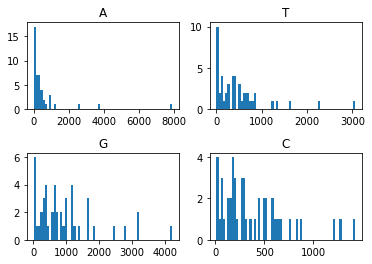

In [65]:
fig, axs = plt.subplots(2, 2)
n_bins = len(df)
plt.subplots_adjust(wspace=1/5, hspace=1/2)
axs[0, 0].hist(df['A'], bins=n_bins)
axs[0, 0].set_title('A')
axs[0, 1].hist(df['T'], bins=n_bins)
axs[0, 1].set_title('T')
axs[1, 0].hist(df['G'], bins=n_bins)
axs[1, 0].set_title('G')
axs[1, 1].hist(df['C'], bins=n_bins)
axs[1, 1].set_title('C')

2. Отбор необходимых данных (5 баллов) 
Сохраните в файл train_part.csv следующую часть из файла train.csv (из предыдущего задания): 
Строки, где matches больше чем среднее 
Колонки pos, reads_all, mismatches, deletions, insertions df

In [66]:
df = df.assign(MEAN = (df.pos + df.reads_all + df.matches + df.mismatches + df.deletions + df.insertions)/6)
df = df.loc[df.matches > df.MEAN]
df.loc[:, :'C_fraction']
df.to_csv('train_part.csv')

3. Сделать небольшой EDA (15 баллов) 
Проведите Explorative Data Analysis какого-нибудь датасета (прошу, только не Титаник). Нужны корреляции, графики распределений 

In [94]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   228 non-null    float64
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


In [95]:
df.describe()

,admit,gre,gpa,rank
count,228.000000,400.000000,400.000000,400.00000
mean,0.315789,587.700000,3.389900,2.48500
std,0.465852,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [102]:
df

,admit,gre,gpa,rank
0,0.0,380,3.61,3
1,1.0,660,3.67,3
2,NaN,800,4.00,1
3,NaN,640,3.19,4
4,0.0,520,2.93,4
...,...,...,...,...
395,0.0,620,4.00,2
396,0.0,560,3.04,3
397,0.0,460,2.63,2
398,0.0,700,3.65,2


Text(0.5, 1.0, 'rank')

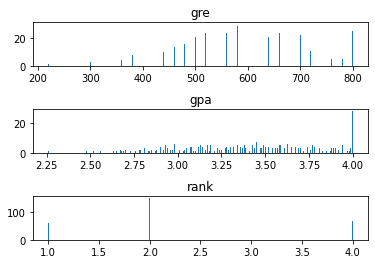

In [107]:
fig, axs = plt.subplots(3, 1)
n_bins = len(df)
plt.subplots_adjust(wspace=1/5, hspace=1)
axs[0].hist(df['gre'], bins=n_bins)
axs[0].set_title('gre')
axs[1].hist(df['gpa'], bins=n_bins)
axs[1].set_title('gpa')
axs[2].hist(df['rank'], bins=n_bins)
axs[2].set_title('rank')

In [109]:
df.corr()

,admit,gre,gpa,rank
admit,1.000000,0.142738,0.160872,-0.304625
gre,0.142738,1.000000,0.384266,-0.123447
gpa,0.160872,0.384266,1.000000,-0.057461
rank,-0.304625,-0.123447,-0.057461,1.000000
